In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

### Load the experiment results

In [2]:
results = pd.read_parquet('../data/linear_models_results.parquet')
print(results.shape)
results.head()

(620, 16)


,epoch,mean_distance_online_gradient,covar_distance_online_gradient,wasserstein_online_gradient,mean_distance_online_em,covar_distance_online_em,wasserstein_online_em,latent_dim,trial,mean_norm,covar_norm,alpha,beta,dataset,n_samples,observation_dim
0,0,11.744393,3.776858,145.272568,11.744393,3.776858,145.272568,1,1,11.744393,0.414119,5.982033,0.011822,boston_housing,506,13
1,10,11.645546,3.776858,142.960541,11.645546,3.776858,142.960541,1,1,11.744393,0.414119,5.982033,0.011822,boston_housing,506,13
2,20,11.645156,3.577734,142.465546,11.645156,0.413837,137.004059,1,1,11.744393,0.414119,5.982033,0.011822,boston_housing,506,13
3,30,11.645218,3.250218,141.680939,11.645218,0.413844,137.006577,1,1,11.744393,0.414119,5.982033,0.011822,boston_housing,506,13
4,40,11.645233,2.946002,140.966278,11.645233,0.413865,137.009430,1,1,11.744393,0.414119,5.982033,0.011822,boston_housing,506,13


### Compute relative distances

In [3]:
mean_distance_columns = ['mean_distance_online_gradient', 'mean_distance_online_em']
results[mean_distance_columns] = results[mean_distance_columns].values / results[['mean_norm']].values

covar_distance_columns = ['covar_distance_online_gradient', 'covar_distance_online_em']
results[covar_distance_columns] = results[covar_distance_columns].values / results[['covar_norm']].values

### Plot distance between true and estimated covariance matrices

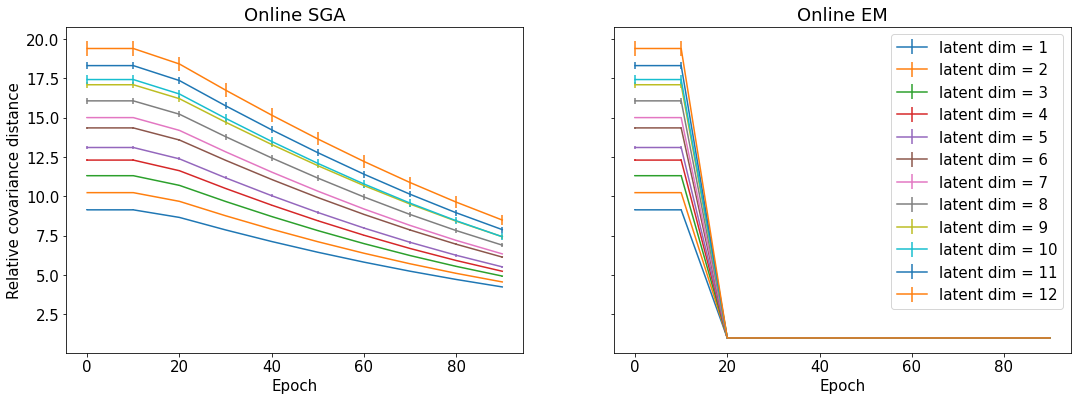

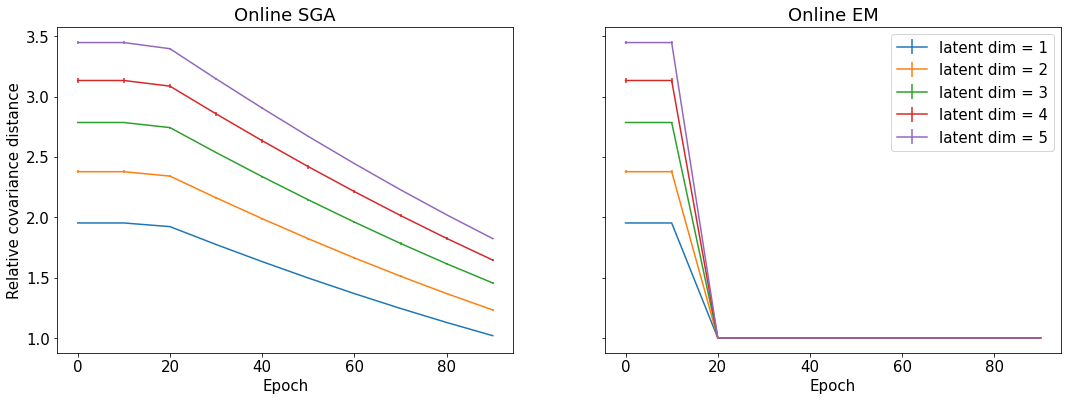

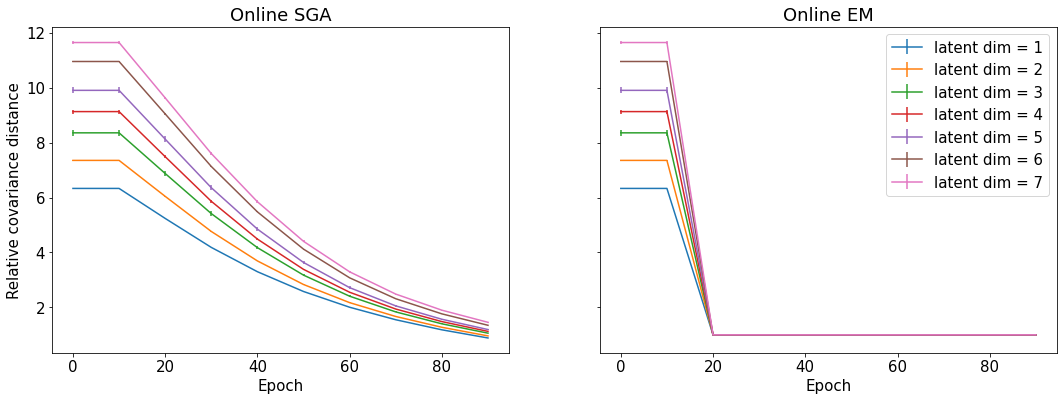

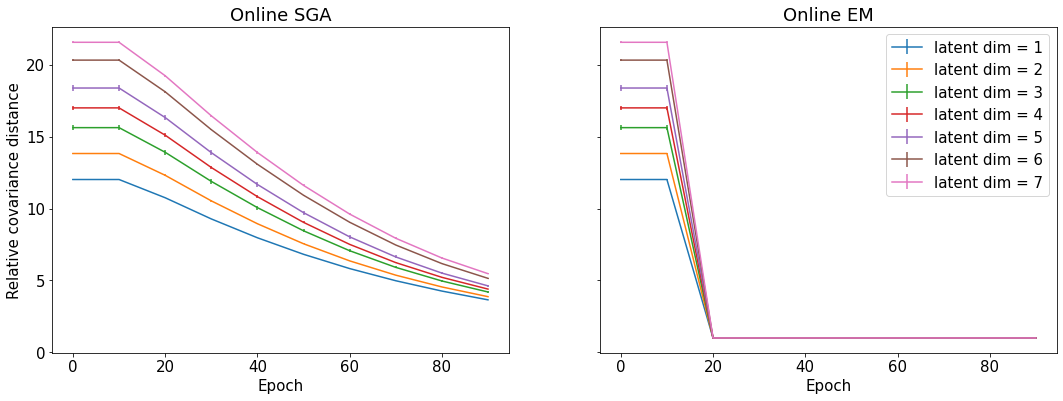

In [33]:
metric_columns = ['covar_distance_online_gradient', 'covar_distance_online_em']
plot_labels = ['Online SGA', 'Online EM']

for dataset_label in results['dataset'].unique():
    dataset_results = results[results['dataset'] == dataset_label]
    
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
    
    for latent_dim in dataset_results['latent_dim'].unique():
        filtered_results = dataset_results[dataset_results['latent_dim'] == latent_dim]
        grouped_results = filtered_results.groupby('epoch')
        group_means = grouped_results[metric_columns].mean()
        group_se = grouped_results[metric_columns].sem()
        
        for ax, metric in zip(axes, metric_columns):
            x = group_means.index
            y = group_means[metric]
            se = group_se[metric]
            ax.errorbar(x, y, se, label=f'latent dim = {latent_dim}', marker=None)
        
    for i, ax in enumerate(axes):
        ax.set_xlabel('Epoch')
        ax.set_title(plot_labels[i])
        
    axes[0].set_ylabel('Relative covariance distance')
    plt.legend()
    plt.show()